In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Scattering rate
# Delta : [1/s] detuning
# s     : saturation parameter
# Gamma : [1/s] linewidth
def Rscatt(Delta, s, Gamma):
    return (Gamma/2)*s/(1+s+(2*Delta/Gamma)**2)

# Calculate g_F factor
def g_F(S, L, J, I, F):
    g_L, g_S = 1, 2
    
    # If no nuclear spin, set F = J
    if(I == 0):
        F = J
        
    g_J = g_L*(J*(J+1)-S*(S+1)+L*(L+1))/(2*J*(J+1)) + g_S*(J*(J+1)+S*(S+1)-L*(L+1))/(2*J*(J+1))
    return g_J*(F*(F+1)-I*(I+1)+J*(J+1))/(2*F*(F+1))

# Calculate Zeeman shift for given m_F state
# B   : [G] quantization magnetic field
# m_F : hyperfine state (or m_J if I=0)
def zeeman(B, S, L, J, I, F, m_F):
    g = g_F(S, L, J, I, F)
    muB = (927.4009994e-26)*(1e-4)/(6.626070040e-34)*(1e-6) # [MHz/G]
    return muB * B * g * m_F

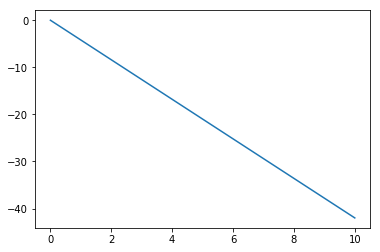

In [98]:
x=np.linspace(0, 10, 1000)
y=zeeman(x, 1/2, 0, 1/2, 5/2, 1, 1)
plt.plot(x,y)